# Titanic: Machine Learning from Disaster

___

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv', index_col=0)

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary

| Variable | Definition                                 | Key                                            |
|----------|:------------------------------------------:|:----------------------------------------------:|
|survival  | Survival                                   | 0 = No, 1 = Yes                                |
|pclass	   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
|sex       | Sex                                        |                                                |
|Age       | Age in years                               |                                                |
|sibsp     | # of siblings / spouses aboard the Titanic |                                                |
|parch     | # of parents / children aboard the Titanic |                                                |
|ticket    | Ticket number                              |                                                |
|fare      | Passenger fare                             |                                                |
|cabin     | Cabin number                               |                                                |
|embarked  | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


___
## Embarked vs Survived:
### Is the port that the passenger embarked a significant factor in survival?

### Observed

In [5]:
embarked_survival = pd.crosstab(data.Embarked, 
                                data.Survived, 
                                margins=True)
embarked_survival

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


### Proportions

In [6]:
embarked_survival_proportions = pd.crosstab(data.Embarked,
                                            data.Survived,
                                            normalize='index')
embarked_survival_proportions

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


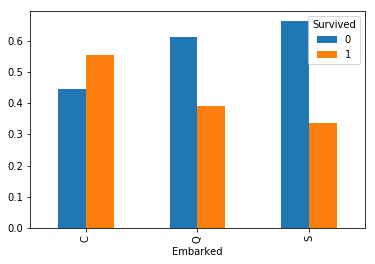

In [7]:
embarked_survival_proportions.plot.bar()

It appears that the passengers that embarked on port C have a higher proportion of survivals. Is this differences of proportions significant?

In [8]:
st.chi2_contingency(embarked_survival.iloc[:-1, :-1])

(26.48914983923762,
 1.769922284120912e-06,
 2,
 array([[103.7480315,  64.2519685],
        [ 47.5511811,  29.4488189],
        [397.7007874, 246.2992126]]))

Ho: port of embarkation and survival is independent  
Ha: port of embarkation and survival is not independent

p-value is low, it gives strong evidence to reject Ho, and conclude that port of embarkation and survival is not independent.

___
## Class vs Survived:
### Is the passenger class a significant factor in survival?

### Observed

In [9]:
class_survival = pd.crosstab(data.Pclass, 
                             data.Survived, 
                             margins=True)
class_survival

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### Proportions

At first sight the proportion of survival is much higher for higher classes

In [10]:
class_survival_proportions = pd.crosstab(data.Pclass,
                                         data.Survived,
                                         normalize='index')
class_survival_proportions

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


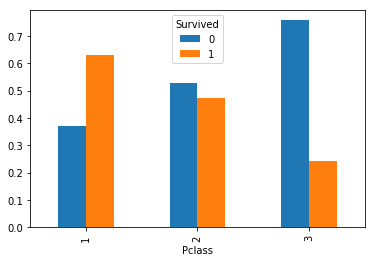

In [11]:
class_survival_proportions.plot.bar()

The trend here is that the lower the class the lower the proportion of survivals, is this significant?

### Chi-square test for independency

In [12]:
st.contingency.chi2_contingency(class_survival.iloc[:-1, :-1])

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

Ho: passenger class and survival are independent  
Ha: passsenger class and survival are **not** independent

As the p-value shows (4.549251711298793e-23), is very unlikely to observe this kind of differences in proportion if both variables were independent. We can reject Ho, and conclude that they  are dependent.

___
## Sex vs Survival:
### Does survival have a gender effect?

### Observations

In [13]:
gender_survival = pd.crosstab(data.Sex,
                              data.Survived,
                              margins=True)
gender_survival

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Proportions

In [14]:
gender_survival_proportions = pd.crosstab(data.Sex,
                                          data.Survived,
                                          normalize='index')
gender_survival_proportions

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


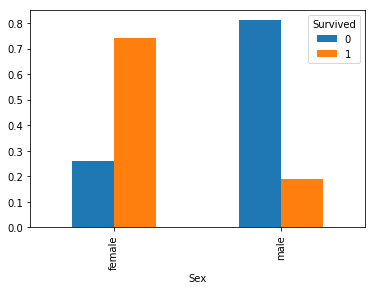

In [15]:
gender_survival_proportions.plot.bar()

The proportion of females that survived is higher, is this difference significant?

### Chi-square test for independence

In [16]:
st.contingency.chi2_contingency(gender_survival.iloc[:-1, :-1])  # exclude margins

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

Ho: sex and survival are independent  
Ha: ser and survival are **not** independent

P value is verly low, this gives us a strong evidence against the null hyphotesis, we can conclude that both variables are not independent. In other words survival is affected by passenger Gender.

___
## Fare vs Survived
### Is survival influenced by the fare the passenger paid?

### Logistic regression

In [17]:
from statsmodels.discrete.discrete_model import Logit

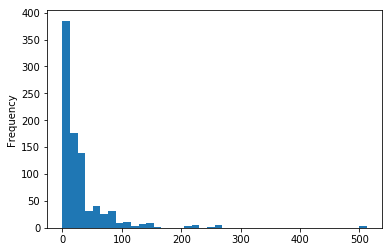

In [18]:
data.Fare.plot.hist(bins=40)

In [19]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

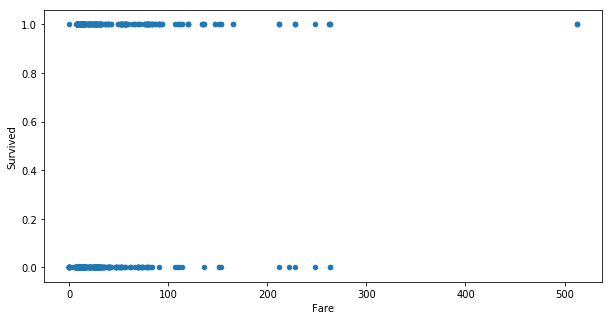

In [20]:
data.loc[:, ['Survived', 'Fare']].plot.scatter('Fare', 'Survived', figsize=(10, 5))

There appears to be a lot of overlap

In [21]:
logit = Logit(data.Survived, data.Fare)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4


In [22]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   4.0000   
Dependent Variable: Survived         Pseudo R-squared: -0.035   
Date:               2018-05-04 18:02 AIC:              1230.7774
No. Observations:   891              BIC:              1235.5697
Df Model:           0                Log-Likelihood:   -614.39  
Df Residuals:       890              LL-Null:          -593.33  
Converged:          1.0000           Scale:            1.0000   
-------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Fare     0.0030      0.0012    2.4342    0.0149    0.0006    0.0054
================================================================

"""

Ho: the surviving outcome probability is not associated with fare  
Ha: the surviving outcome **is** accociated with fare

The p-value is significantly low 1.5%, considering 5% significance test we can reject Ho and conclude that the fare payed is associated with the surviving outcome probability.

### Is there a difference between mean of fare payed by passengers that survived and passengers that did not?

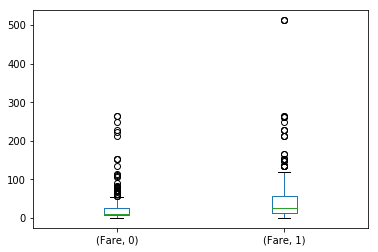

In [23]:
survived_fare = data.loc[:, ['Survived', 'Fare']].pivot(columns='Survived')
survived_fare.plot.box()

In [24]:
survived_fare.describe()

Fare            
Survived           0           1
count     549.000000  342.000000
mean       22.117887   48.395408
std        31.388207   66.596998
min         0.000000    0.000000
25%         7.854200   12.475000
50%        10.500000   26.000000
75%        26.000000   57.000000
max       263.000000  512.329200

At first sight survivors seeemed to have had payed more.

In [25]:
died = survived_fare.Fare.loc[:, 0].dropna()
lived = survived_fare.Fare.loc[:, 1].dropna()
st.f_oneway(died, lived)

F_onewayResult(statistic=63.03076422804448, pvalue=6.120189341921873e-15)

Ho: u1 - u2 = 0  
Ha: u1 - u2 != 0

Where u1 is the fare payed by survivors and u2 the fare payed by not survivors.

The p-value is extremely low, this means that the differences observed in the means is not caused by sampling variability. We have strong evidence against Ho, therefore we reject Ho and conclude that there's a significant difference between both means.

#### Confidence intervals

In [26]:
st.norm.interval(.95, died.mean(), died.std())

(-39.4018674539644, 83.6376412244562)

In [27]:
st.norm.interval(.95, lived.mean(), died.std())

(-13.124346736871118, 109.91516194154948)

___
## SibSP vs Survived: 
### Having sibilings or spouse is associated in some way to survival outcome?